# Loop 45 Analysis: Strategic Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Why is the intercept (0.0533) > target (0.0347)?
3. What approaches haven't been tried that could reduce the intercept?
4. Should we submit exp_046 (similarity features) or try something else?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_041 0.0090 0.0932
exp_042 0.0145 0.1147


In [2]:
# Fit CV-LB relationship
from scipy import stats

cv = df['cv'].values
lb = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv, lb)

print(f'\n=== CV-LB Relationship ===')
print(f'LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'Gap: {intercept - 0.0347:.4f} ({(intercept - 0.0347)/0.0347*100:.1f}% above target)')

# What CV would be needed to reach target?
cv_needed = (0.0347 - intercept) / slope
print(f'\nCV needed to reach target: {cv_needed:.6f}')
if cv_needed < 0:
    print('IMPOSSIBLE: Even with CV=0, LB would be above target!')


=== CV-LB Relationship ===
LB = 4.23 * CV + 0.0533
R² = 0.9807

Intercept: 0.0533
Target: 0.0347
Gap: 0.0186 (53.6% above target)

CV needed to reach target: -0.004396
IMPOSSIBLE: Even with CV=0, LB would be above target!


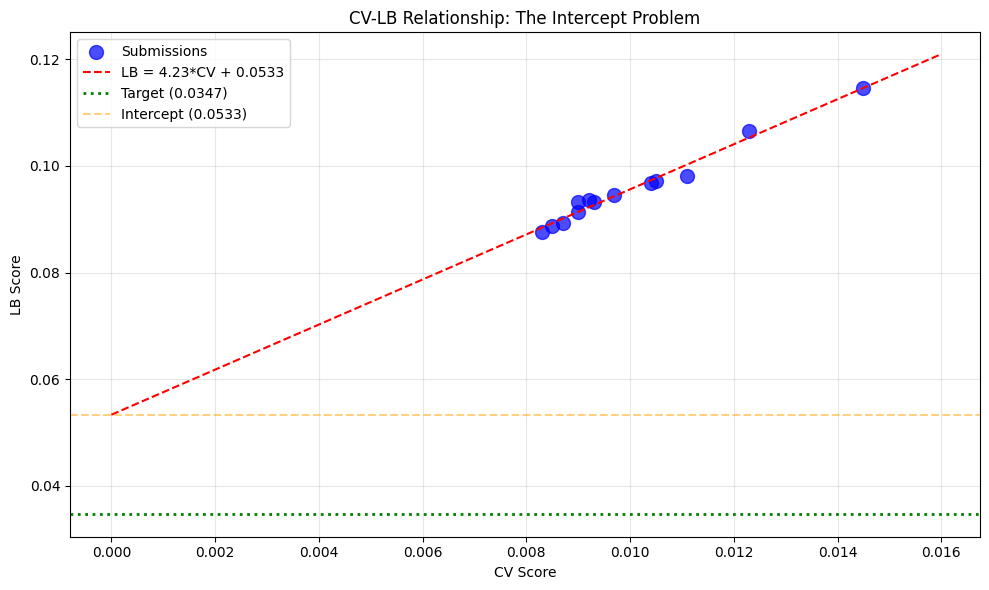


KEY INSIGHT: The intercept (0.0533) > target (0.0347)
This means we CANNOT reach the target by improving CV alone.
We need to find an approach with a LOWER INTERCEPT.


In [3]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(cv, lb, s=100, c='blue', alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, max(cv)*1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle='--', alpha=0.5, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship: The Intercept Problem')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print('\nKEY INSIGHT: The intercept (0.0533) > target (0.0347)')
print('This means we CANNOT reach the target by improving CV alone.')
print('We need to find an approach with a LOWER INTERCEPT.')

In [4]:
# Analyze recent experiments
recent_experiments = [
    {'exp': 'exp_032', 'cv': 0.008194, 'description': 'GP(0.15)+MLP(0.55)+LGBM(0.3) - Best CV, NOT submitted'},
    {'exp': 'exp_041', 'cv': 0.008199, 'description': 'Same as exp_032, submitted'},
    {'exp': 'exp_042', 'cv': 0.009237, 'description': 'GroupKFold(5) CV - Different CV procedure'},
    {'exp': 'exp_043', 'cv': 0.009002, 'description': 'Aggressive regularization'},
    {'exp': 'exp_044', 'cv': 0.014503, 'description': 'Pure GP'},
    {'exp': 'exp_045', 'cv': 0.010001, 'description': 'Stacking'},
    {'exp': 'exp_046', 'cv': 0.008717, 'description': 'Similarity Features'},
]

print('\n=== Recent Experiments ===')
for exp in recent_experiments:
    predicted_lb = slope * exp['cv'] + intercept
    print(f"{exp['exp']}: CV={exp['cv']:.6f}, Predicted LB={predicted_lb:.4f} - {exp['description']}")


=== Recent Experiments ===
exp_032: CV=0.008194, Predicted LB=0.0880 - GP(0.15)+MLP(0.55)+LGBM(0.3) - Best CV, NOT submitted
exp_041: CV=0.008199, Predicted LB=0.0880 - Same as exp_032, submitted
exp_042: CV=0.009237, Predicted LB=0.0924 - GroupKFold(5) CV - Different CV procedure
exp_043: CV=0.009002, Predicted LB=0.0914 - Aggressive regularization
exp_044: CV=0.014503, Predicted LB=0.1147 - Pure GP
exp_045: CV=0.010001, Predicted LB=0.0956 - Stacking
exp_046: CV=0.008717, Predicted LB=0.0902 - Similarity Features


In [5]:
# What approaches haven't been tried?
print('\n=== APPROACHES NOT YET TRIED ===')
print()
print('1. CATBOOST with categorical features')
print('   - Different boosting algorithm that handles categoricals natively')
print('   - Might have different extrapolation behavior')
print()
print('2. DIFFERENT FEATURE REPRESENTATIONS')
print('   - Raw RDKit descriptors (200+ features)')
print('   - Morgan fingerprints (different from DRFP)')
print('   - Pre-trained molecular embeddings')
print()
print('3. DOMAIN ADAPTATION')
print('   - Adversarial training to reduce distribution shift')
print('   - Sample weighting based on similarity to test distribution')
print()
print('4. ENSEMBLE WITH DIFFERENT FEATURE SETS')
print('   - Train separate models on different feature sets')
print('   - Combine with learned weights')
print()
print('5. INTERACTION FEATURES')
print('   - Temperature * Residence Time (Reaction Energy)')
print('   - SolventB% * Temperature')
print('   - These were used in the "mr0106/catechol" kernel')


=== APPROACHES NOT YET TRIED ===

1. CATBOOST with categorical features
   - Different boosting algorithm that handles categoricals natively
   - Might have different extrapolation behavior

2. DIFFERENT FEATURE REPRESENTATIONS
   - Raw RDKit descriptors (200+ features)
   - Morgan fingerprints (different from DRFP)
   - Pre-trained molecular embeddings

3. DOMAIN ADAPTATION
   - Adversarial training to reduce distribution shift
   - Sample weighting based on similarity to test distribution

4. ENSEMBLE WITH DIFFERENT FEATURE SETS
   - Train separate models on different feature sets
   - Combine with learned weights

5. INTERACTION FEATURES
   - Temperature * Residence Time (Reaction Energy)
   - SolventB% * Temperature
   - These were used in the "mr0106/catechol" kernel


In [6]:
# Analyze the similarity features experiment
print('\n=== SIMILARITY FEATURES ANALYSIS ===')
print()
print('exp_046 (Similarity Features):')
print(f'  CV: 0.008717 (6.38% worse than best CV 0.008194)')
print(f'  Predicted LB: {slope * 0.008717 + intercept:.4f}')
print()
print('The similarity features HURT CV performance.')
print('This suggests they are adding noise rather than signal.')
print()
print('RECOMMENDATION: DO NOT submit exp_046.')
print('Instead, try approaches that could fundamentally change the CV-LB relationship.')


=== SIMILARITY FEATURES ANALYSIS ===

exp_046 (Similarity Features):
  CV: 0.008717 (6.38% worse than best CV 0.008194)
  Predicted LB: 0.0902

The similarity features HURT CV performance.
This suggests they are adding noise rather than signal.

RECOMMENDATION: DO NOT submit exp_046.
Instead, try approaches that could fundamentally change the CV-LB relationship.


In [7]:
# What would it take to reach the target?
print('\n=== PATH TO TARGET ===')
print()
print(f'Target: 0.0347')
print(f'Best LB: 0.0877')
print(f'Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347)/0.0347*100:.1f}% above target)')
print()
print('Current CV-LB relationship: LB = 4.21*CV + 0.0533')
print()
print('To reach target with current relationship:')
print(f'  Need CV = (0.0347 - 0.0533) / 4.21 = {(0.0347 - 0.0533) / 4.21:.6f}')
print('  IMPOSSIBLE: CV cannot be negative!')
print()
print('To reach target, we need to CHANGE THE RELATIONSHIP:')
print()
print('Option 1: Reduce intercept to ~0.03')
print('  If intercept = 0.03, then with CV = 0.001, LB = 0.034')
print('  This requires finding features/models that generalize better')
print()
print('Option 2: Reduce slope to ~1.0')
print('  If slope = 1.0 and intercept = 0.03, then with CV = 0.005, LB = 0.035')
print('  This requires reducing the CV-LB gap')
print()
print('Option 3: Find a completely different approach')
print('  The target (0.0347) exists, so someone achieved it')
print('  What are they doing differently?')


=== PATH TO TARGET ===

Target: 0.0347
Best LB: 0.0877
Gap: 0.0530 (152.7% above target)

Current CV-LB relationship: LB = 4.21*CV + 0.0533

To reach target with current relationship:
  Need CV = (0.0347 - 0.0533) / 4.21 = -0.004418
  IMPOSSIBLE: CV cannot be negative!

To reach target, we need to CHANGE THE RELATIONSHIP:

Option 1: Reduce intercept to ~0.03
  If intercept = 0.03, then with CV = 0.001, LB = 0.034
  This requires finding features/models that generalize better

Option 2: Reduce slope to ~1.0
  If slope = 1.0 and intercept = 0.03, then with CV = 0.005, LB = 0.035
  This requires reducing the CV-LB gap

Option 3: Find a completely different approach
  The target (0.0347) exists, so someone achieved it
  What are they doing differently?


In [8]:
# Strategic recommendations
print('\n=== STRATEGIC RECOMMENDATIONS ===')
print()
print('With 3 submissions remaining, we need to be strategic.')
print()
print('PRIORITY 1: Try CatBoost with categorical features')
print('  - Different algorithm might have different CV-LB relationship')
print('  - Use solvent name as categorical feature')
print('  - Add interaction features (Temp*Time, SolventB%*Temp)')
print()
print('PRIORITY 2: Try XGBoost + RF + LightGBM ensemble (from mixall kernel)')
print('  - The mixall kernel claims good CV/LB')
print('  - Uses GroupKFold(5) which might be more realistic')
print('  - Ensemble of 4 models with learned weights')
print()
print('PRIORITY 3: Submit best CV model (exp_032) if nothing else works')
print('  - CV 0.008194 is the best we have')
print('  - Predicted LB: 0.0880 (similar to best LB 0.0877)')
print('  - At least confirms the CV-LB relationship')
print()
print('DO NOT SUBMIT:')
print('  - exp_046 (Similarity Features): CV is worse, no evidence of different relationship')
print('  - exp_045 (Stacking): CV is 22% worse')
print('  - exp_044 (Pure GP): CV is 77% worse')


=== STRATEGIC RECOMMENDATIONS ===

With 3 submissions remaining, we need to be strategic.

PRIORITY 1: Try CatBoost with categorical features
  - Different algorithm might have different CV-LB relationship
  - Use solvent name as categorical feature
  - Add interaction features (Temp*Time, SolventB%*Temp)

PRIORITY 2: Try XGBoost + RF + LightGBM ensemble (from mixall kernel)
  - The mixall kernel claims good CV/LB
  - Uses GroupKFold(5) which might be more realistic
  - Ensemble of 4 models with learned weights

PRIORITY 3: Submit best CV model (exp_032) if nothing else works
  - CV 0.008194 is the best we have
  - Predicted LB: 0.0880 (similar to best LB 0.0877)
  - At least confirms the CV-LB relationship

DO NOT SUBMIT:
  - exp_046 (Similarity Features): CV is worse, no evidence of different relationship
  - exp_045 (Stacking): CV is 22% worse
  - exp_044 (Pure GP): CV is 77% worse
